### Face Detection ###

In [2]:
import mediapipe as mp
import cv2
import time
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import math
import numpy as np

In [2]:
cap_f=cv2.VideoCapture('video1.mp4')

MODEL

In [12]:
mpFaceDetection=mp.solutions.face_detection
faceDetection=mpFaceDetection.FaceDetection(0.20)
mpDraw=mp.solutions.drawing_utils
while True:
    success, img_f=cap_f.read()
    img_r=cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB)
    result_f=faceDetection.process(img_r)
    
    if result_f.detections:
        for id, detection in enumerate(result_f.detections):
            bboxc=detection.location_data.relative_bounding_box
            h,w,_=img_f.shape
            bbox=int(bboxc.xmin*w), int(bboxc.xmin*h), int(bboxc.width*w), int(bboxc.height*h)
            cv2.rectangle(img_f, bbox, (0,255,255),2)
    cv2.imshow('img_f', img_f)
    cv2.waitKey(5)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### Face Mesh ###

In [4]:
cap_f=cv2.VideoCapture('video1.mp4')

MODEL

In [5]:
mpFaceMesh=mp.solutions.face_mesh
FaceMesh=mpFaceMesh.FaceMesh(max_num_faces=1)
mpDraw=mp.solutions.drawing_utils
drawspec=mpDraw.DrawingSpec(thickness=1, circle_radius=1)

while True:
    success, img_f=cap_f.read()
    img_=cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB)
    result_m=FaceMesh.process(img_)
    print(result_m.multi_face_landmarks)
    
    if result_m.multi_face_landmarks:
        for facelms in result_m.multi_face_landmarks:
            mpDraw.draw_landmarks(img, facelms, mpFaceMesh.FACEMESH_TESSELATION, drawspec)
        for id, lm in enumerate(facelms.landmark):
            h,w,_=img_f.shape
            cx,cy=int(lm.x*w), int(lm.y*h)
            #print([id, cx, cy])
    cv2.imshow('img_f', img_f)
    cv2.waitKey(15)

[landmark {
  x: 0.49575290083885193
  y: 0.4673156440258026
  z: -0.028308024629950523
}
landmark {
  x: 0.4962092936038971
  y: 0.41539740562438965
  z: -0.05444600060582161
}
landmark {
  x: 0.4962144196033478
  y: 0.4318740665912628
  z: -0.029977969825267792
}
landmark {
  x: 0.4898070991039276
  y: 0.3601168990135193
  z: -0.04008188843727112
}
landmark {
  x: 0.4965052604675293
  y: 0.397891640663147
  z: -0.05748935416340828
}
landmark {
  x: 0.49715563654899597
  y: 0.37561559677124023
  z: -0.05324297770857811
}
landmark {
  x: 0.49870923161506653
  y: 0.3227670192718506
  z: -0.025917112827301025
}
landmark {
  x: 0.4338921308517456
  y: 0.3203173875808716
  z: 0.015044689178466797
}
landmark {
  x: 0.49934300780296326
  y: 0.2871435582637787
  z: -0.018123717978596687
}
landmark {
  x: 0.49965786933898926
  y: 0.26572543382644653
  z: -0.019376473501324654
}
landmark {
  x: 0.5011065602302551
  y: 0.18209944665431976
  z: -0.006860104389488697
}
landmark {
  x: 0.4956434965

NameError: name 'img' is not defined

### Sleep Detection ###

In [6]:
pip install cvzone

Note: you may need to restart the kernel to use updated packages.


In [13]:
import cvzone
from cvzone.FaceMeshModule import FaceMeshDetector
from cvzone.PlotModule import LivePlot

In [14]:
cap_s=cv2.VideoCapture('videoS.mp4')

MODEL

In [15]:
detector=FaceMeshDetector()
ploty=LivePlot(540,360,[10,60])

while True:
    success, img_s=cap_s.read()
    img_s,faces=detector.findFaceMesh(img_s)
    cv2.imshow('img_s', img_s)
    cv2.waitKey(10)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


'360' is minimum video size.

We only want to see the eyes;

In [16]:
detector=FaceMeshDetector()
ploty=LivePlot(540,360,[10,60])
#those are his left eyes id.
idList=[22,23,24,26,110,157,158,159,160,161,130,243]
color=(255,0,0)
ratioList=[]
counter=0
blindcounter=0

while True:
    success, img_s=cap_s.read()
    img_s,faces=detector.findFaceMesh(img_s)
    if faces:
        face=faces[0]
        for id in idList:
            cv2.circle(img_s, face[id], 5, color, cv2.FILLED)
        leftup=face[159]
        leftdown=face[23]
        leftleft=face[150]
        leftright=face[243]
        lenghtver,_=detector.findDistance(leftup, leftdown)
        lenghthor,_=detector.findDistance(leftup, leftdown)
        
        cv2.line(img_s, leftup, leftdown, (0,0,255), 3)
        cv2.line(img_s, leftleft,leftright, (0,0,255),3)
        
        ratio=int(lenghtver/lenghthor)*100
        ratioList.append(ratio)
        if len(ratioList)>3:
            ratioList.pop(0)
        ratioAvg=sum(ratioList)/len(ratioList)
        print(ratioAvg)
        
        if ratioAvg<35 and counter==0:
            blindcounter+=1
            counter=1
        if counter !=0:
            counter+=1
            if counter>10:
                counter=0
        imgplot=Ploty.update(ratioAvg, color)
        img_s=cv2.resize(img_s, (640,360))
        imgStack=cvzone.stackImages([img_s, imgplot], 2,1)
                
        
        
        
        
    cv2.imshow('img_s', imgStack)
    cv2.waitKey(10)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### Road Line Detection ###

In [17]:
cap_r=cv2.VideoCapture('videoL.mp4')

MODEL

In [18]:
while True:
    success, img_r=cap_r.read()
    
    if success:
        cv2.imshow('img_r', img_r)
        cv2.waitKey(10)
    else:break

In [19]:
while True:
    success, img_r=cap_r.read()
    def region_of_interest(image, vertices):
        mask=np.zeros_like(image)
    
        macth_mask_color=255
        cv2.fillPoly(mask, vertices, macth_mask_color)
        masked_image=cv2.bitwise_and(image, mask)
        return masked_image
    def drawLines(image,lines):
        blank_image=np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(blank_image, (x1,y1),(x2,y2), (0,0,255), thickness=10)
        image=cv2.addWeighted(image, 0.8, blank_image, 1, 0.0)
        return image
    def process(image):
        h,w=img_r.shape[0], image[1]
    
        region_of_interest_vertices=[(0, h), (w/2, h/2), (w,h)]
    
        gray_image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        canny_image=cv2.Canny(gray_image, (210,120))
        cropped_image=region_of_interest(canny_image, np.array([region_of_interest_vertices]), np.int32)
        lines=cv2.HoughLines(cropped_image, rho=2, theta=np.pi/180, threshold=220, lines=np.array([]), minLineLenght=150, maxLineGap=5)
        imageWithLine=drawLines(image, lines)
        return imageWithLine
    cv2.imshow('img_r', img_r)
    cv2.waitKey(10)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


### Hand Tracking ###

In [20]:
image=cv2.imread('depositphotos_64964803.jpg')

In [21]:
cv2.imshow('image', image)

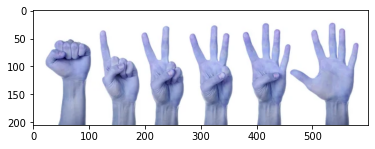

In [22]:
plt.imshow(image);

In [23]:
image.shape

(205, 600, 3)

In [24]:
image_rgb=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

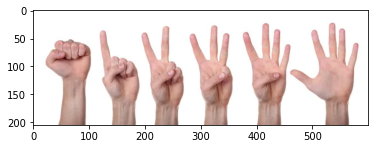

In [25]:
plt.imshow(image_rgb);

for image

MODEL

In [26]:
mp_hand=mp.solutions.hands

In [27]:
hands_f=mp_hand.Hands(max_num_hands=7, static_image_mode=False)

In [28]:
mpDraw=mp.solutions.drawing_utils

In [29]:
mp_drawing_styles = mp.solutions.drawing_styles

In [30]:
m_result=hands_f.process(image_rgb)
m_result_multi=m_result.multi_hand_landmarks
print(m_result_multi)

[landmark {
  x: 0.8997918963432312
  y: 0.7727403044700623
  z: 3.09280522969857e-07
}
landmark {
  x: 0.8601073622703552
  y: 0.7292215824127197
  z: -0.015640465542674065
}
landmark {
  x: 0.8287189602851868
  y: 0.6461054682731628
  z: -0.0268013384193182
}
landmark {
  x: 0.803672730922699
  y: 0.5857275724411011
  z: -0.03696957603096962
}
landmark {
  x: 0.7790684103965759
  y: 0.5524223446846008
  z: -0.048003263771533966
}
landmark {
  x: 0.8685322999954224
  y: 0.47454461455345154
  z: -0.020296204835176468
}
landmark {
  x: 0.8533015847206116
  y: 0.35017064213752747
  z: -0.034596461802721024
}
landmark {
  x: 0.8447028398513794
  y: 0.2688570022583008
  z: -0.04629116505384445
}
landmark {
  x: 0.8386889696121216
  y: 0.19988974928855896
  z: -0.05497037619352341
}
landmark {
  x: 0.8944671750068665
  y: 0.4643345773220062
  z: -0.024019092321395874
}
landmark {
  x: 0.893020749092102
  y: 0.316333532333374
  z: -0.03666727989912033
}
landmark {
  x: 0.892145037651062
  y:

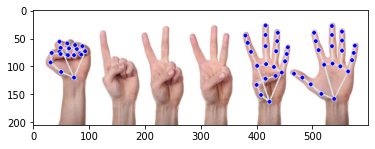

In [31]:
if m_result_multi:
    for handLms in m_result_multi:
        mpDraw.draw_landmarks(image_rgb, handLms, mp_hand.HAND_CONNECTIONS)
plt.imshow(image_rgb);

for video

In [32]:
cap = cv2.VideoCapture(0)

MODEL

In [ ]:
mpHands = mp.solutions.hands
hands = mpHands.Hands(static_image_mode=False,
                      max_num_hands=2,
                      min_detection_confidence=0.5,
                      min_tracking_confidence=0.5)
mpDraw = mp.solutions.drawing_utils
pTime = 0
cTime = 0

while True:
    success, img = cap.read()
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(imgRGB)
   

    if results.multi_hand_landmarks:
        for handLms in results.multi_hand_landmarks:
            for id, lm in enumerate(handLms.landmark):
                h, w, c = img.shape
                cx, cy = int(lm.x *w), int(lm.y*h)
                
                cv2.circle(img, (cx,cy), 3, (255,0,255), cv2.FILLED)

            mpDraw.draw_landmarks(img, handLms, mpHands.HAND_CONNECTIONS)


    cTime = time.time()
    fps = 1/(cTime-pTime)
    pTime = cTime
    cv2.putText(img,str(int(fps)), (10,70), cv2.FONT_HERSHEY_PLAIN, 3, (255,0,255), 3)

    cv2.imshow("Image", img)
    cv2.waitKey(1)

### Finger Counting ###

In [1]:
img=cv2.imread('depositphotos_6937427-l.jpg')

NameError: name 'cv2' is not defined

In [ ]:
plt.imshow(img);

In [ ]:
image_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
mp_hand=mp.solutions.hands
hands_f=mp_hand.Hands(max_num_hands=7)
mpDraw=mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
m_result=hands_f.process(image_rgb)
m_result_multi=m_result.multi_hand_landmarks
if m_result_multi:
    for handLms in m_result_multi:
        mpDraw.draw_landmarks(image_rgb, handLms, mp_hand.HAND_CONNECTIONS)
        for ıd,lm in enumerate(handLms.landmark):
            w,h,_=image_rgb.shape
            cx, cy = int(lm.x *w), int(lm.y*h)
            cv2.circle(image_rgb, (cx,cy), 3, (255,0,0), cv2.FILLED)
            LMlist.append([ıd, cx, cy])
plt.imshow(image_rgb);

In [ ]:
LMlist=[]
ıds=[4,8,12,16,20]

In [ ]:
if len(LMlist)!=0:
    fingers=[]
    if LMlist[ıds[1]]<LMlist[ıds-1[1]]:
        fingers.append(1)
    else:
        fingers.append(0)
    for ıd in range(1,5):
        if LMlist[ıds[2]]<LMlist[ıds-2[2]]:
            fingers.append(1)
        else:
            fingers.append(0)

In [ ]:
fingers.count(image_rgb)

### Pose Estimation ###

In [3]:
video='videopose.mp4'

In [4]:
cap=cv2.VideoCapture(video)
img_v=cap.read()

MODEL

In [5]:
mpPose=mp.solutions.pose
pose=mpPose.Pose()
mpDraw=mp.solutions.drawing_utils

In [6]:
pTime=0

In [10]:
while True:
    
    img_=cv2.cvtColor(img_v, cv2.COLOR_BGR2RGB)
    results=pose.process(img_)
    result_landmarks=results.pose_landmarks
    if result_landmarks:
        mpDraw.draw_landmarks(img, result_landmarks, mpPose.POSE_CONNECTIONS)
        for id, lm in enumerate(results.pose_landmarks.landmark):
            h, w, c = img.shape
            cx, cy = int(lm.x *w), int(lm.y*h)
            if id==13:
                cv2.circle(img, (cx,cy), 3, (255,0,255), cv2.FILLED)
    cTime = time.time()
    fps = 1/(cTime-pTime)
    pTime = cTime
    cv2.putText(img,str(int(fps)), (10,70), cv2.FONT_HERSHEY_PLAIN, 3, (255,0,255), 3)

    cv2.imshow("Image", img)
    cv2.waitKey(1)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'src'
